In [35]:
## awkward hack to import local modules in Jupyter
import sys
sys.executable
sys.path.append('/mnt/bigdata/frontierSI/qa4mbes-data-pipeline/qa4mbes')
import json
import geojson

In [59]:
import getvectorcoverage
import getgridcoverage
from getpointcoverage import tolatlon

In [37]:
shpcoverage = getvectorcoverage.getvectorcoverage('../tests/geotiff-test-grid1.shp')

In [38]:
type(shpcoverage)

str

In [39]:
jsoncoverage = getvectorcoverage.getvectorcoverage('../tests/testcoverage.geojson')

In [40]:
type(jsoncoverage)

str

In [41]:
from testcoverage import jsontoshapely

In [42]:
this = jsontoshapely(jsoncoverage)

In [43]:
that = jsontoshapely(shpcoverage)

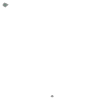

In [44]:
this.union(that)

In [45]:
nullcoverage = getvectorcoverage.getvectorcoverage('../tests/nulltest.shp')

In [46]:
other = jsontoshapely(nullcoverage)

In [47]:
geojson.dumps(other.union(this))

'{"type": "MultiPolygon", "coordinates": [[[[148.5293497143106, -41.82134162120646], [148.5298832236405, -41.81960771588428], [148.5330042532204, -41.81958104041778], [148.53647206386478, -41.821394972139444], [148.53167047989567, -41.824302597987405], [148.5293497143106, -41.82134162120646]]], [[[148.52130039229576, -41.824085859822155], [148.52847609278288, -41.82379242969071], [148.52934304544397, -41.826379949940716], [148.5223273977558, -41.82779374966494], [148.5196865265728, -41.82603316887628], [148.52130039229576, -41.824085859822155]]]]}'

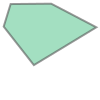

In [48]:
other

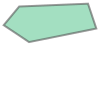

In [17]:
this

In [73]:
gridcoverage = getgridcoverage.getgridcoverage("../../sampledata/raster/grid1_1m.tiff")

In [74]:
gridcoverage

'{"type": "MultiPolygon", "coordinates": [[[[519682.5, 5654526.5], [519685.5, 5654526.5], [519685.5, 5654524.5], [519682.5, 5654524.5], [519682.5, 5654526.5]]], [[[519677.5, 5654569.5], [519680.5, 5654569.5], [519680.5, 5654568.5], [519679.5, 5654568.5], [519679.5, 5654567.5], [519677.5, 5654567.5], [519677.5, 5654569.5]]], [[[519660.5, 5654629.5], [519662.5, 5654629.5], [519662.5, 5654627.5], [519661.5, 5654627.5], [519660.5, 5654627.5], [519660.5, 5654626.5], [519658.5, 5654626.5], [519658.5, 5654627.5], [519659.5, 5654627.5], [519659.5, 5654628.5], [519660.5, 5654628.5], [519660.5, 5654629.5]]], [[[519555.5, 5654724.5], [519557.5, 5654724.5], [519557.5, 5654722.5], [519556.5, 5654722.5], [519556.5, 5654721.5], [519554.5, 5654721.5], [519554.5, 5654723.5], [519555.5, 5654723.5], [519555.5, 5654724.5]]], [[[519529.5, 5654357.5], [519531.5, 5654357.5], [519531.5, 5654354.5], [519530.5, 5654354.5], [519530.5, 5654355.5], [519529.5, 5654355.5], [519529.5, 5654357.5]]], [[[519572.5, 56543

In [79]:
llgrid = tolatlon(jsontoshapely(gridcoverage),'+proj=utm +zone=55 +south +ellps=WGS84 +datum=WGS84 +units=m +no_defs')

In [85]:
llgrid.intersects(this)

False